In [ ]:
#@title Everything in Part 1 copied over

!pip install -U -q PyDrive
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import defaultdict

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

stockData = drive.CreateFile({'id':"1Gtf_20aW4H81JRwjvdKozlF49sXpZzID"}) 
stockData.GetContentFile('stock_data.csv')
cleaned_data = pd.read_csv('stock_data.csv')
cleaned_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text,Sentiment
0,kicker on my watchlist xide tit soq pnk cpw bp...,1
1,user aap movie return for the fea geed indicat...,1
2,user i d be afraid to short amzn they are look...,1
3,mnta over,1
4,oi over,1


In [ ]:
X = cleaned_data['Text']
y = cleaned_data['Sentiment']

vec = CountVectorizer(max_features=4000)
X = vec.fit_transform(X).toarray()

pca = PCA(n_components=256)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<h1 align="center">Decision Trees</h1>

<img src="https://i.ytimg.com/vi/ZVR2Way4nwQ/maxresdefault.jpg" align="left">

Perhaps the easiest algorithm to understand in ML. Basically, it takes all the data, and tries to create a decision tree, and based off of a data point, it reaches a class that hopefully classifies it correctly.


In [22]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Decision Tree: {}".format(accuracy_score(y_test,y_pred)))

Decision Tree: 0.6246764452113891


We have multiple hyperparemeters to test, so we assume they are independent and test them one by one:

In [31]:
#Entropy

model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Decision Tree (Gini): {}".format(accuracy_score(y_test,y_pred)))

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Decision Tree (Entropy): {}".format(accuracy_score(y_test,y_pred)))

model = DecisionTreeClassifier(criterion = "log_loss")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Decision Tree (Log Loss): {}".format(accuracy_score(y_test,y_pred)))

Decision Tree (Gini): 0.6220880069025022
Decision Tree (Entropy): 0.636755823986195
Decision Tree (Log Loss): 0.633304572907679


Which tells us a criterion of entropy works best.

In [41]:
min_splits = np.arange(2,21,1)
ls = []

for i in min_splits:
  model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  ls.append(accuracy_score(y_test,y_pred))

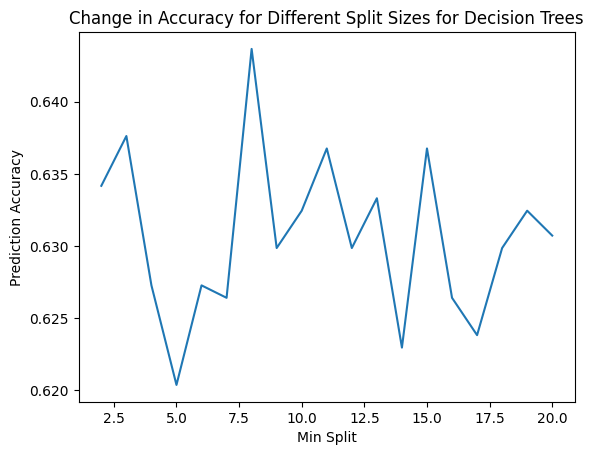

In [42]:
plt.title('Change in Accuracy for Different Split Sizes for Decision Trees')
plt.xlabel('Min Split')
plt.ylabel('Prediction Accuracy')
 
plt.plot(min_splits,ls)

Which indicates that a min split of 8 works best, giving us all the hyperparameters we need.